### web crawling
- 1. requests: json: 동적페이지 (URL 변경없이 데이터를 수정 및 추가 )
- 2. requests: html: 정적페이지 (URL 변경으로 데이터를 수정 및 추가)
- 3. selenium: web browser: 1,2번 방법을 사용하지 못할 때 사용
    

#### 1. 네이버 주식 데이터 크롤링 
- 코스피 데이터 수집
- 코스닥 데이터 수집
- USD환율 데이터 수집 
- 그래프, 상관계수 확인 

#### 크롤링 절차 
- 1. 웹 서비스 분석: URL 확인 
- 2. request, response: json 데이터(문자열)을 얻기
- 3. json 데이터(문자열) -> dict(파싱) -> 데이터 프레임 

In [1]:
import requests

In [2]:
# 1. 웹서비스 분석 : URL 찾기
code, page_size, page = "KOSPI", 20, 1


url = "https://m.stock.naver.com/api/json/sise/dailySiseIndexListJson.nhn?code={}&pageSize={}&page={}".format(code, page_size, page)

print(url)

https://m.stock.naver.com/api/json/sise/dailySiseIndexListJson.nhn?code=KOSPI&pageSize=20&page=1


In [3]:
# 2. request, response : JSON(str)
respond = requests.get(url)
respond

<Response [200]>

In [6]:
import pandas as pd

In [17]:
# 3. JSON(str) -> JSON(dict) -> DF
datas = respond.json()["result"]["siseList"]
kospi_df = pd.DataFrame(datas)
kospi_df.tail(2)

,cd,cr,cv,dt,hv,lv,ncv,ov
18,KOSPI,-0.95,-23.01,20200921,2427.17,2379.38,2389.39,2412.44
19,KOSPI,0.26,6.23,20200918,2417.81,2396.33,2412.40,2413.53


In [18]:
# 코스닥 데이터 크롤링 함수로 만들기 

def get_stock_data(code, page_size=20, page=1):
    url = "https://m.stock.naver.com/api/json/\
sise/dailySiseIndexListJson.nhn?code={}\
&pageSize={}&page={}".format(code, page_size, page)
    response = requests.get(url)
    datas = response.json()["result"]["siseList"]
    return pd.DataFrame(datas)

In [19]:
kosdaq_df = get_stock_data("KOSDAQ", 100)
kosdaq_df.tail(2)

,cd,cr,cv,dt,hv,lv,ncv,ov
98,KOSDAQ,0.70,4.93,20200529,714.51,700.84,713.68,706.16
99,KOSDAQ,-2.19,-15.84,20200528,728.80,695.30,708.75,728.76


In [20]:
kospi_df = get_stock_data("KOSPI", 100)
kospi_df.tail(2)

,cd,cr,cv,dt,hv,lv,ncv,ov
98,KOSPI,0.05,1.06,20200529,2038.89,2006.62,2029.60,2018.37
99,KOSPI,-0.13,-2.66,20200528,2054.52,2003.75,2028.54,2047.08


#### USD 수집

In [21]:
# 1. 웹페이지 분석 : URL 찾기

In [22]:
code, page_size, page = "FX_USDKRW", 100, 1

url = "https://m.stock.naver.com/api/json/marketindex/marketIndexDay.nhn?marketIndexCd={}&pageSize={}&page={}"\
.format(code, page_size, page)

print(url)

https://m.stock.naver.com/api/json/marketindex/marketIndexDay.nhn?marketIndexCd=FX_USDKRW&pageSize=100&page=1


In [26]:
# 2. request, response : JSON(str)
# 쿠키 데이터 추가해서 요청 

params = {
    "cookie": "NNB=7K4ZOLYOV6DV6; NRTK=ag#all_gr#1_ma#-2_si#0_en#0_sp#0; nx_ssl=2; _ga=GA1.1.1921936816.1603073336; _ga_7VKFYR6RV1=GS1.1.1603073335.1.1.1603073350.45; nid_inf=807390818; NID_AUT=Wx2hqhKSiUhhUYB3dLr5PdUg8O2pe/9Lq09yEMM1A/5Z+nF5/9hkQpYQ6nFXvgvc; NID_JKL=61NaeC+M0VTW6ezWMO4nZZnZpwiAgVoTML3D07wUc2w=; page_uid=UG+Dgwp0YidssN2n2Chssssss0N-381886; NID_SES=AAABnbJc5yzGGYxr+l1Tv0ZzM+c8HYMPhLMTa8roZZJrdVvVKytPBIx9xTAhwLgO8YUbjJ+/gIuOB4+FxB7zYz55LcnptepVfDgX6hcEO4HIQqQAm4AlmyKY/Uw0FUjBPnDh1mQT0XzuW8w2aJMKESc26dHErJivf03R6k+D648/c2jVGba0DFs5LwbQB2LG46Nzq9CgAmhrTcmRwKuu4NcHTtBZb+hEa3NKDpCZV7R9Y5TZh7oK/8j8n103K8+lXYztLIjQL2WPMAkxEFrWZMzDBgd4jzTiiOt01PsofG90QA6rcgR+9tQITWwu1TGP6lTyQep+NZ/RpB1zk6XlztFqOqlCAU+a4fYMCW4R8zwJNVCLonDCT+nWC22AzW7HCoGxjDezkSwPJxkSAr5mBG/nDm7IA4aYb5kANc7uCz+vwVOTuEq5zQU/I9jrLJdmVF/dClrHOa2rpRKL29L6HwgwQw/lXWAqpQz6bnC4AiueVRqvSzogaNWM25FlbeYKWqLxYcW3ex9e59C+pH2WTLGCntAY2B1/qIbjj/GXd6MWOwvx; JSESSIONID=5C920C383DC5B759377E9E3D1695AD18; BMR=; XSRF-TOKEN=210a8db4-516c-4d1b-9e3e-9c06355c6518"
}
respond = requests.get(url, headers=params)
respond

<Response [200]>

In [27]:
respond.text

'{"result":{"marketIndexDay":[{"dt":"20201021","nv":1132.8,"cv":-6.2,"cr":-0.54,"cbv":1152.62,"csv":1112.98,"sv":1143.9,"rv":1121.7},{"dt":"20201020","nv":1139.0,"cv":-1.0,"cr":-0.09,"cbv":1158.93,"csv":1119.07,"sv":1150.1,"rv":1127.9},{"dt":"20201019","nv":1140.0,"cv":-6.0,"cr":-0.52,"cbv":1159.95,"csv":1120.05,"sv":1151.1,"rv":1128.9},{"dt":"20201016","nv":1146.0,"cv":-1.5,"cr":-0.13,"cbv":1166.05,"csv":1125.95,"sv":1157.2,"rv":1134.8},{"dt":"20201015","nv":1147.5,"cv":1.0,"cr":0.09,"cbv":1167.58,"csv":1127.42,"sv":1158.7,"rv":1136.3},{"dt":"20201014","nv":1146.5,"cv":0.5,"cr":0.04,"cbv":1166.56,"csv":1126.44,"sv":1157.7,"rv":1135.3},{"dt":"20201013","nv":1146.0,"cv":-4.0,"cr":-0.35,"cbv":1166.05,"csv":1125.95,"sv":1157.2,"rv":1134.8},{"dt":"20201012","nv":1150.0,"cv":-2.5,"cr":-0.22,"cbv":1170.12,"csv":1129.88,"sv":1161.2,"rv":1138.8},{"dt":"20201008","nv":1152.5,"cv":-6.0,"cr":-0.52,"cbv":1172.66,"csv":1132.34,"sv":1163.7,"rv":1141.3},{"dt":"20201007","nv":1158.5,"cv":-3.0,"cr":-0.

In [28]:
# 3. JSON(str) -> DF
datas = respond.json()["result"]["marketIndexDay"]
usd_df = pd.DataFrame(datas)
usd_df.tail(2)

,cbv,cr,csv,cv,dt,nv,rv,sv
98,1259.66,-0.16,1216.34,-2.0,20200529,1238.0,1225.9,1250.1
99,1261.70,0.45,1218.30,5.5,20200528,1240.0,1227.9,1252.1


In [29]:
print(usd_df["dt"].values)

['20201021' '20201020' '20201019' '20201016' '20201015' '20201014'
 '20201013' '20201012' '20201008' '20201007' '20201006' '20201005'
 '20200929' '20200928' '20200925' '20200924' '20200923' '20200922'
 '20200921' '20200918' '20200917' '20200916' '20200915' '20200914'
 '20200911' '20200910' '20200909' '20200908' '20200907' '20200904'
 '20200903' '20200902' '20200901' '20200831' '20200828' '20200827'
 '20200826' '20200825' '20200824' '20200821' '20200820' '20200819'
 '20200818' '20200814' '20200813' '20200812' '20200811' '20200810'
 '20200807' '20200806' '20200805' '20200804' '20200803' '20200731'
 '20200730' '20200729' '20200728' '20200727' '20200724' '20200723'
 '20200722' '20200721' '20200720' '20200717' '20200716' '20200715'
 '20200714' '20200713' '20200710' '20200709' '20200708' '20200707'
 '20200706' '20200703' '20200702' '20200701' '20200630' '20200629'
 '20200626' '20200625' '20200624' '20200623' '20200622' '20200619'
 '20200618' '20200617' '20200616' '20200615' '20200612' '20200

In [30]:
# 데이터 합치기 

In [31]:
merge_df_1 = pd.merge(kospi_df, kosdaq_df, left_on = "dt", right_on="dt")
merge_df_1 = merge_df_1.rename(columns={"ncv_x":"ncv_KOSPI", "ncv_y":"ncv_KOSDAQ"})
merge_df_1 = merge_df_1[["dt", "ncv_KOSPI", "ncv_KOSDAQ"]]
merge_df_1.tail(2)

,dt,ncv_KOSPI,ncv_KOSDAQ
98,20200529,2029.60,713.68
99,20200528,2028.54,708.75


In [32]:
merge_df = pd.merge(merge_df_1, usd_df)[["dt", "ncv_KOSPI", "ncv_KOSDAQ", "nv"]]
merge_df.tail(2)

,dt,ncv_KOSPI,ncv_KOSDAQ,nv
98,20200529,2029.60,713.68,1238.0
99,20200528,2028.54,708.75,1240.0


In [33]:
# 그래프 그리기 

In [34]:
import matplotlib.pyplot as plt
# %matplotlib inline

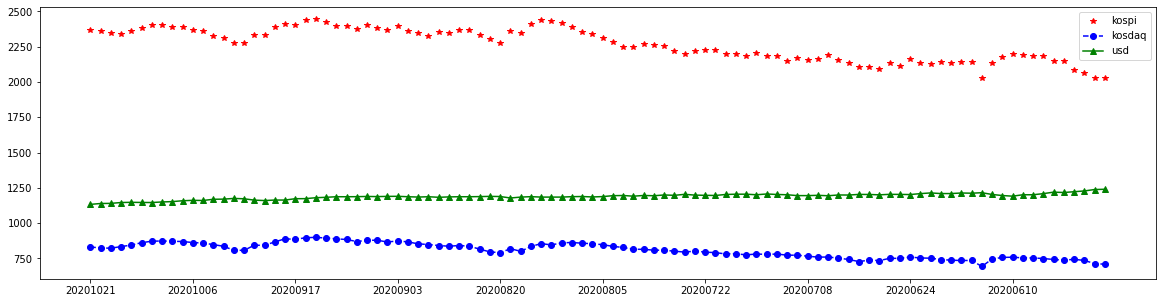

In [45]:
plt.figure(figsize =(20,5))

plt.plot(merge_df["dt"], merge_df["ncv_KOSPI"], "r*", label = "kospi")
plt.plot(merge_df["dt"], merge_df["ncv_KOSDAQ"], "bo--", label = "kosdaq")
plt.plot(merge_df["dt"], merge_df["nv"], "g^-", label = "usd")

plt.legend(loc=0)

# xtick이 항상 10개 출력되도록
step = len(merge_df)//10
plt.xticks(merge_df[::step]["dt"])
plt.show()

#### 정규화 : normalization
- z = (x-min(x)) /(max(x)-min(x))

In [38]:
from sklearn import preprocessing

In [50]:
preprocessing.minmax_scale(merge_df["ncv_KOSPI"])[:10]

array([0.82478797, 0.79479086, 0.76667309, 0.75412008, 0.8015372 ,
       0.84796646, 0.9025877 , 0.90398516, 0.87562645, 0.86353123])

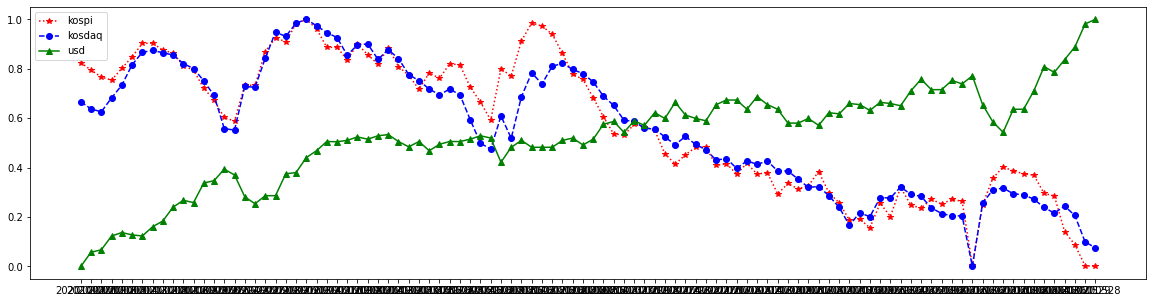

In [51]:
plt.figure(figsize = (20, 5))

plt.plot(merge_df["dt"], preprocessing.minmax_scale(merge_df["ncv_KOSPI"]), "r*:", label = "kospi")
plt.plot(merge_df["dt"], preprocessing.minmax_scale(merge_df["ncv_KOSDAQ"]), "bo--", label = "kosdaq")
plt.plot(merge_df["dt"], preprocessing.minmax_scale(merge_df["nv"]), "g^-", label = "usd")

plt.legend(loc=0)

plt.show()

In [52]:
import numpy as np

In [59]:
np.corrcoef(merge_df["ncv_KOSPI"], merge_df["ncv_KOSDAQ"])[0,1]

0.9594306670791254

In [60]:
np.corrcoef(merge_df["ncv_KOSPI"], merge_df["nv"])[0,1]

-0.763509897679378

In [61]:
np.corrcoef(merge_df["ncv_KOSDAQ"], merge_df["nv"])[0,1]

-0.7127569780071198